In [15]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


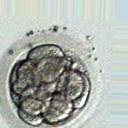

In [ ]:
img = image.load_img("/content/drive/My Drive//Datasets/ImagesDB/Augmented_trains/Augmented_0/kelas1_0_20.jpeg")
img

In [ ]:
cv2.imread("/content/drive/My Drive//Datasets/ImagesDB/Augmented_trains/Augmented_0/kelas1_0_20.jpeg").shape

(128, 128, 3)

In [3]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [5]:
train_dataset = train.flow_from_directory('/content/drive/My Drive//Datasets/ImagesDB/trains/',
                                         target_size = (128,128),
                                         batch_size = 5,
                                         )

validation_dataset = train.flow_from_directory('/content/drive/My Drive//Datasets/ImagesDB/tests/',
                                         target_size = (128,128),
                                         batch_size = 5,
                                         )

Found 443 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'0': 0, '1': 1}

In [7]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (128,128,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    
                                   tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    
                                   tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                    
                                   tf.keras.layers.Flatten(),
                                    
                                   tf.keras.layers.Dense(512, activation = 'relu'),
                                    
                                   tf.keras.layers.Dense(2, activation='softmax')
                                   ])

In [10]:
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr=0.005),
              metrics = ['accuracy']
             )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [12]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 1,
                     epochs = 50,
                     validation_data = validation_dataset 
                     )

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.6938 - accuracy: 0.4000 - val_loss: 0.6910 - val_accuracy: 0.6000
Epoch 2/50
1/1 [==============================] - 1s 985ms/step - loss: 0.6862 - accuracy: 0.8000 - val_loss: 0.6850 - val_accuracy: 0.6000
Epoch 3/50
1/1 [==============================] - 1s 773ms/step - loss: 0.6846 - accuracy: 0.6000 - val_loss: 0.6838 - val_accuracy: 0.6000
Epoch 4/50
1/1 [==============================] - 1s 972ms/step - loss: 0.6834 - accuracy: 0.6000 - val_loss: 0.6825 - val_accuracy: 0.6000
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.6316 - accuracy: 1.0000 - val_loss: 0.6755 - val_accuracy: 0.6000
Epoch 6/50
1/1 [==============================] - 1s 834ms/step - loss: 0.6228 - accuracy: 0.8000 - val_loss: 0.6729 - val_accuracy: 0.6000
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.5070 - accuracy: 1.0000 - val_loss: 0.7042 - val_accuracy: 0.6000
Epoch 8/50
1/1 [=============

KeyboardInterrupt: ignored

In [ ]:
! pip3 install ann_visualizer

from ann_visualizer.visualize import ann_viz;

ann_viz(model, view=True, title="My first neural network")

# Method 2 (Ellipse Detection)

In [13]:
import cv2 
import numpy as np 
  
# Read image. 
img = cv2.imread("/content/drive/My Drive//Datasets/ImagesDB/trains/0/kelas1 (38).png", cv2.IMREAD_COLOR) 


# Convert to grayscale. 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(gray, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(gray_blurred,  
                   cv2.HOUGH_GRADIENT, 1, 10, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 40) 
  


error: ignored

In [ ]:
print(detected_circles)

[[[60.5 68.5 33.8]
  [44.5 76.5 17.2]
  [83.5 46.5 17.2]
  [40.5 50.5 13.7]
  [55.5 39.5 13.6]
  [67.5 45.5 11.1]
  [85.5 79.5  9.4]]]


-1

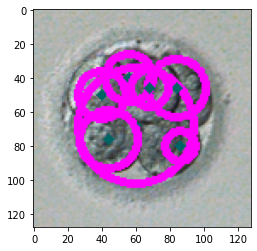

In [ ]:
from google.colab.patches import cv2_imshow

if detected_circles is not None:
        circles = np.uint16(np.around(detected_circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img, center, radius, (255, 0, 255), 3)
    
    
plt.imshow(img)
cv2.waitKey(0)

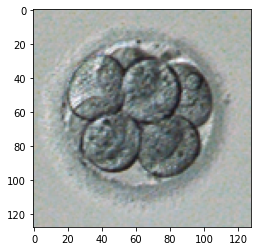

In [ ]:
img1 = cv2.imread("/content/drive/My Drive//Datasets/ImagesDB/trains/0/kelas1 (38).png", cv2.IMREAD_COLOR)
plt.imshow(img1)

# Using Simple Blob Detector

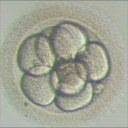

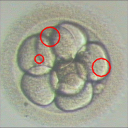

-1

In [57]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


#im = cv2.imread("/content/drive/My Drive//Datasets/ImagesDB/trains/0/kelas1 (38).png")
im = cv2.imread("/content/drive/My Drive//Datasets/d31.jpg")
im = cv2.resize(im, (128, 128))
cv2_imshow(im)

params = cv2.SimpleBlobDetector_Params()

params.minThreshold = 0
params.maxThreshold = 5000
#params.filterByArea = True
#params.minArea = 0
params.filterByCircularity = True
params.minCircularity = 0.1
params.filterByConvexity = True
params.minConvexity = 0
#params.filterByInertia = True
#params.minInertiaRatio = 0.01

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(im)
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(im_with_keypoints)
cv2.waitKey(0)

In [20]:
keypoints

[]

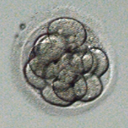

In [ ]:
cv2_imshow(im)


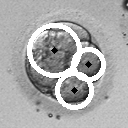

In [ ]:
from google.colab.patches import cv2_imshow
# Show blobs
cv2_imshow(img)

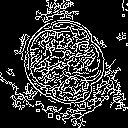

In [ ]:
from google.colab.patches import cv2_imshow
# Show blobs
cv2_imshow(img1)

In [ ]:
import cv2 
#import cv2.cv as cv
import numpy as np 
  
# Read image. 
img = cv2.imread("/content/drive/My Drive//Datasets/ImagesDB/trains/0/kelas1 (36).png", 0) 
  
# Convert to grayscale. 
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img1 = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

img1 = cv2.Canny(img, 200, 20)

# Blur using 3 * 3 kernel. 
#gray_blurred = cv2.blur(gray, (3, 3)) 

# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(img1, cv2.HOUGH_GRADIENT, 1, 10, param1 = 50, 
               param2 = 30, minRadius = 1, maxRadius = 30) 
  


error: ignored

In [ ]:
detected_circles

array([[[54.5, 49.5, 25. ],
        [74.5, 90.5, 17.2],
        [87.5, 63.5, 15. ]]], dtype=float32)

In [ ]:
from google.colab.patches import cv2_imshow

if detected_circles is not None:
        circles = np.uint16(np.around(detected_circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            # circle center
            cv2.circle(img, center, 1, (0, 100, 100), 3)
            # circle outline
            radius = i[2]
            cv2.circle(img, center, radius, (255, 0, 255), 3)
    
    
cv2_imshow(img)
cv2.waitKey(0)

NameError: ignored

# FINAL 

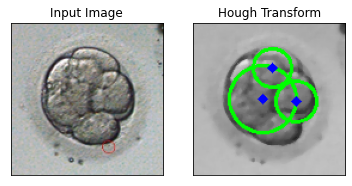

In [72]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

bgr_img = cv2.imread('/content/drive/My Drive//Datasets/ImagesDB/trains/0/kelas1 (36).png')
#bgr_img = cv2.imread("/content/drive/My Drive//Datasets/d31.jpg")
#bgr_img = cv2.resize(im, (128, 128))

if bgr_img.shape[-1] == 3:           
    b,g,r = cv2.split(bgr_img)       
    rgb_img = cv2.merge([r,g,b])     
    gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
else:
    gray_img = bgr_img




img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=100)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cimg)
plt.title('Hough Transform'), plt.xticks([]), plt.yticks([])
plt.show()

In [59]:
circles

array([[75],
       [ 0],
       [ 0],
       [ 0]], dtype=uint16)